# Why Use Python for GIS?
##### *this tutorial was created by Hilario Lumbreras with assistance of Chat GPT*
*Notebook 1 of 5*

Python has become an essential language in the field of Geographic Information Systems (GIS). Its simplicity, readability, and extensive library ecosystem make it a preferred choice for geospatial professionals and researchers. Here's why:

## 1. Rich Library Ecosystem
Python boasts a plethora of libraries tailored for GIS tasks. Libraries like Geopandas, Shapely, Pyproj, Fiona, and Rasterio cater to different facets of geospatial processing.

## 2. Versatility
Python can be used for a wide range of tasks – from basic data processing and visualization to complex spatial analyses, web mapping applications, and even machine learning on geospatial data.

## 3. Integration with GIS Platforms
Python scripts can be easily integrated into popular GIS platforms like QGIS, ArcGIS, and GRASS GIS. This makes it possible to automate tasks and workflows, enhancing productivity.

## 4. Community Support
With an ever-growing community of GIS professionals and developers, there is a vast amount of tutorials, forums, and online resources available to troubleshoot issues and learn new techniques.

## 5. Platform Independence
Python is cross-platform, which means scripts written on one operating system (e.g., Windows) can typically run on another (e.g., Linux or macOS) without modification.

## 6. Open-Source Advantage
Many of Python's geospatial libraries are open source. This means users benefit from community-driven improvements, no licensing fees, and the freedom to customize the tools according to their needs.

## So what?
Incorporating Python into GIS tasks provides flexibility, efficiency, and a modern approach to data analysis and spatial problem-solving. Whether you're a GIS professional seeking to automate repetitive tasks, a researcher conducting spatial analysis, or a developer building a geospatial application, Python offers the tools and libraries to meet diverse geospatial needs.



### What is Geopandas and why start here?

Geopandas is an open-source Python library that simplifies working with geospatial data in Python. It extends the datatypes used by pandas (a popular data analysis library in Python) to allow for the storage and manipulation of spatial data.

### Citing and More info
We're using code and data from this course, look through it and try it out :) https://darribas.org/gds_course/content/home.html

### Key Features:
1. **DataFrame Structure:** Geopandas operates with a data structure called a GeoDataFrame, which is similar to a pandas DataFrame but has a special column for geometry (points, lines, polygons).
2. **Integrated with Other Libraries**: Works well with other Python libraries like shapely (for geometry operations), fiona (for file I/O), and matplotlib (for plotting).
3. **Data I/O:** Geopandas can read and write from/to a variety of spatial data formats including shapefiles, GeoJSON, and others.
4. **Spatial Operations:** Supports many spatial operations such as spatial joins, intersects, and buffering.



### Libraries Synopsis:

1. **geopandas**:
   - **What**: An open-source Python library that makes working with geospatial data in Python easier. It extends the capabilities of pandas to allow spatial operations on geometric types.
   - **Uses**: Manipulating and analyzing geometric data, spatial operations, and easily plotting maps.

2. **fiona**:
   - **What**: Fiona is all about reading and writing vector data (like shapefiles or GeoJSON). 
   - **Uses**: Reading from and writing to different vector file formats in a pythonic way, works seamlessly with geopandas for data input/output.

3. **pyproj**:
   - **What**: A Python interface to the PROJ library, which handles cartographic projections and coordinate transformations.
   - **Uses**: Transforming coordinate points, lines, and polygons from one coordinate system to another. Often used alongside geopandas to reproject spatial data.

4. **pandas**:
   - **What**: Offers flexible and powerful data structures for data manipulation and analysis in Python.
   - **Uses**: Data cleaning, transformation, aggregation, and visualization. Essential for handling tabular data with mixed data types.

5. **pyarrow**:
   - **What**: A cross-language development platform for in-memory data that specifies a standardized language-independent columnar memory format for flat and hierarchical data.
   - **Uses**: Optimized for analytics, it enables efficient reading and writing of large datasets, interoperability between different big data solutions, and acts as a bridge between the pandas DataFrame in Python and big data platforms.
```


There are many great tutorials out there.These inspired many of teh exampels in this notebook and I took a few of my faovirtes from here too. Here are some of my personal favorites:

- [Geospatial Python Course from the University of Liverpool](https://darribas.org/gds_course/content/bC/lab_C.html)
- [Geographic Data Science- An Open Source Geospatial Data Science Python Book](https://geographicdata.science/book/intro.html#geographic-data-science-with-python)
- [GeoPandas Introduction](https://geopandas.org/en/stable/getting_started/introduction.html)
- [DataCamp GeoPandas Tutorial](https://www.datacamp.com/tutorial/geopandas-tutorial-geospatial-analysis)

In [1]:
# Install GeoPandas and its dependencies
!pip install geopandas fiona pyproj pandas pyarrow

## A quick example to put it into action: 
You have data on oil wells in a particular region and a separate dataset on protected natural reserves. You want to know which oil wells are within these protected areas to ensure regulatory compliance.

## Data:

- wells.csv: Contains coordinates and other data of oil wells.
- reserves.geojson: Contains the boundary polygons of protected natural reserves.
- Objective: Identify oil wells located within the protected areas.

### wells.csv

Imagine that each oil well has:

- A unique identifier.
- Latitude and longitude coordinates.
- The date it started operation.
- The current production rate in barrels per day (bpd).

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Sample data
data = {
    'well_id': [101, 102, 103, 104, 105],
    'latitude': [40.7128, 40.7138, 40.7148, 40.7158, 40.7168],
    'longitude': [-74.0060, -74.0070, -74.0080, -74.0090, -74.0100],
    'start_date': ['2021-01-15', '2020-03-10', '2019-08-24', '2018-11-05', '2017-04-12'],
    'production_bpd': [1000, 1200, 950, 1100, 1050]
}

# Create a DataFrame
df_wells = pd.DataFrame(data)

# Create a GeoDataFrame by adding a geometry column with Point objects
gdf_wells = gpd.GeoDataFrame(
    df_wells,
    geometry=[Point(lon, lat) for lon, lat in zip(df_wells['longitude'], df_wells['latitude'])],
    crs="EPSG:4326"  # Set the coordinate reference system (CRS)
)

# Display the GeoDataFrame
print(gdf_wells)


   well_id  latitude  longitude  start_date  production_bpd  \
0      101   40.7128    -74.006  2021-01-15            1000   
1      102   40.7138    -74.007  2020-03-10            1200   
2      103   40.7148    -74.008  2019-08-24             950   
3      104   40.7158    -74.009  2018-11-05            1100   
4      105   40.7168    -74.010  2017-04-12            1050   

                     geometry  
0  POINT (-74.00600 40.71280)  
1  POINT (-74.00700 40.71380)  
2  POINT (-74.00800 40.71480)  
3  POINT (-74.00900 40.71580)  
4  POINT (-74.01000 40.71680)  


### reserves.geojson
A .geojson file can represent various geospatial data types, including Points, LineStrings, and Polygons. For this mock-up, we'll consider Polygons.

This mock-up reserves.geojson describes two protected reserves: Greenland Reserve and Bluewater Reserve. Each reserve is represented as a polygon, defined by a list of coordinates forming its boundary.

The properties section can contain additional data about each reserve. In this mock-up, it has the reserve name and the year it was established.

In practice, these polygons would likely have more coordinates to define more complex shapes accurately. This is a very simplified version for the sake of demonstration.

Here's what the reserves.geojson might look like in a structured form:

In [3]:
import io
import geopandas as gpd

# Sample geojson data for reserves
geojson_data = """
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "reserve_id": "R1",
        "reserve_name": "Green Haven"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [-74.0075, 40.7135],
            [-74.0075, 40.7145],
            [-74.0085, 40.7145],
            [-74.0085, 40.7135],
            [-74.0075, 40.7135]
          ]
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "reserve_id": "R2",
        "reserve_name": "Blue Sanctuary"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [-74.0095, 40.7155],
            [-74.0095, 40.7165],
            [-74.0105, 40.7165],
            [-74.0105, 40.7155],
            [-74.0095, 40.7155]
          ]
        ]
      }
    }
  ]
}
"""

# Reading the geojson string into a GeoDataFrame
gdf_reserves = gpd.read_file(io.StringIO(geojson_data), driver="GeoJSON")

# Display the reserves GeoDataFrame
print(gdf_reserves)



  reserve_id    reserve_name  \
0         R1     Green Haven   
1         R2  Blue Sanctuary   

                                            geometry  
0  POLYGON ((-74.00750 40.71350, -74.00750 40.714...  
1  POLYGON ((-74.00950 40.71550, -74.00950 40.716...  


c:\ProgramData\Miniconda3\envs\arc_env\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


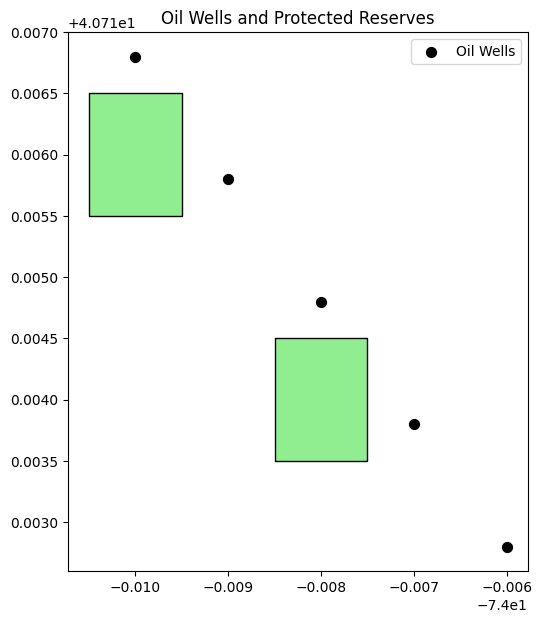

In [4]:
import matplotlib.pyplot as plt

# Spatial join: Find all wells that are within a protected area
gdf_within_reserves = gpd.sjoin(gdf_wells, gdf_reserves, op='within', how='inner')

# First, we will plot the reserves
ax = gdf_reserves.plot(color='lightgreen', edgecolor='black', figsize=(10, 7))

# Next, we plot all oil wells using black color
gdf_wells.plot(ax=ax, color='black', markersize=50, label='Oil Wells')

# Check if any oil wells are within the reserves, if yes then plot them in red
if not gdf_within_reserves.empty:
    gdf_within_reserves.plot(ax=ax, color='red', markersize=70, label='Wells within Reserves')

# Setting the legend and title
plt.legend()
plt.title('Oil Wells and Protected Reserves')

# Display the map
plt.show()


## A Note on the Coordinate Reference System (CRS)

The Coordinate Reference System (CRS) we defined for the oil wells GeoDataFrame (`gdf_wells`) is "EPSG:4326". This is a very commonly used CRS known as WGS 84. In this system:

- Latitude and longitude are represented in decimal degrees.
- The equator is set as the origin for latitude.
- The Prime Meridian in Greenwich, England, is set as the origin for longitude.

For the reserves GeoDataFrame (`gdf_reserves`), the CRS is inherited from the GeoJSON string. Since we didn't explicitly define it in the GeoJSON, it's assumed to be "EPSG:4326" when read into GeoPandas, as that's the default for GeoJSONs.



In [5]:
# Here we can see that they both align
print(gdf_wells.crs)
print(gdf_reserves.crs)


EPSG:4326
EPSG:4326


In [6]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame with two points
data = {'Name': ['Point A', 'Point B'],
        'Latitude': [40.0, 40.0],
        'Longitude': [-75.0, -75.0]}
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Set the initial CRS to WGS84 (latitude-longitude)
gdf = gdf.set_crs(epsg=4326)

# Reproject to UTM Zone 33 North (EPSG:32633)
gdf_utm = gdf.to_crs(epsg=32633)

# Print the coordinates of both points
print("Point A (WGS84):", gdf.geometry.iloc[0])
print("Point B (UTM Zone 33 North):", gdf_utm.geometry.iloc[1])



Point A (WGS84): POINT (-75 40)
Point B (UTM Zone 33 North): POINT (-5945835.4273724845 9997964.943020996)


### Objectives
Here are some of the most important concepts associated with GeoPandas:

1. **GeoDataFrame & GeoSeries**:

   * **GeoSeries**: A pandas Series designed to store geometric objects like points, lines, and polygons from the Shapely library.
      - A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. Think of it as a single list of geometries.
      - Each entry in a GeoSeries is a geometric object, which could be a point, line, polygon, or even a multi-part equivalent (like MultiPolygon).
      - It is the basic data structure in geopandas used to hold the geometry information.
      -Operations on a GeoSeries are typically geometric in nature, such as calculating areas, lengths, distances, or performing geometric operations like union, intersection, etc.
   * **GeoDataFrame**: A fundamental data structure in GeoPandas, it's essentially a pandas DataFrame that has a special column for geometry, making it suitable for storing spatial features.
      - A GeoDataFrame is more complex and can be thought of as a table with rows and columns, where one of the columns is a GeoSeries.
      - In a GeoDataFrame, there is a special 'geometry' column that holds the geometry of the observations; this is what turns a pandas DataFrame into a GeoDataFrame.
      - Besides the geometry column, a GeoDataFrame can contain other columns with additional attributes (numerical, boolean, text, etc.) corresponding to each of the geometries.
      - You can perform typical pandas operations on a GeoDataFrame (like group by, join, merge, etc.), but you also have the spatial operations available from the GeoSeries


2. **Geometry Types**:
   * GeoPandas primarily leverages the Shapely library for geometry. Common geometric objects include:
     * Point
     * LineString
     * Polygon
     * MultiPoint, MultiLineString, MultiPolygon: Used for cases where features have multiple parts.

3. **Coordinate Reference Systems (CRS)**:
   * It's crucial to understand the spatial reference of your data. The CRS provides information on the projection and datum of the geometries.
   * GeoPandas allows you to set, verify, and transform between CRSs.

4. **Spatial Operations**:
   * GeoPandas provides a suite of spatial operations using the underlying capabilities of Shapely:
     * buffer(): Creates a buffer around a geometry.
     * union, intersection, difference: Typical set-based operations.
     * contains, within, intersects: Spatial queries between geometries.

5. **Spatial Joins**:
   * You can merge data based on spatial relationships, such as points within a polygon or lines intersecting lines.

6. **File I/O**:
   * GeoPandas supports various geospatial file formats for reading and writing data, including but not limited to Shapefile, GeoJSON, and Geopackage.
   * The `read_file` and `to_file` functions facilitate this.

7. **Visualization**:
   * GeoPandas integrates with Matplotlib for plotting, allowing for quick visualization of the geospatial data contained in a GeoDataFrame or GeoSeries.

8. **Attributes & Methods**:
   * Like pandas, GeoPandas offers a wide range of attributes (like `area`, `bounds`, `total_bounds`) and methods (like `distance`, `centroid`, `envelope`) that make data exploration and manipulation easier.

9. **Integration with Other Libraries**:
   * GeoPandas seamlessly integrates with other geospatial libraries like Fiona (for file access), PyProj (for handling projections and coordinate transformations), and Rasterio (for raster data processing).


### 1. GeoDataFrame & GeoSeries:
   
#### Exercise: Visualizing Cities on a Map

**Objective:** Create a GeoDataFrame representing three cities and visualize them on a map.

**In this exercise:**



### Points
- Here we load data points from a public GitHub and inspect the data frame

In [3]:
import geopandas

# load in our df
cities = geopandas.read_file("https://ndownloader.figshare.com/files/20232174")

In [4]:
# inspect our df
cities.head()

,city_id,n_buildings,geometry
0,ci000,2348,"POLYGON ((385390.071 4202949.446, 384488.697 4..."
1,ci001,2741,"POLYGON ((214893.033 4579137.558, 215258.185 4..."
2,ci002,5472,"POLYGON ((690674.281 4182188.538, 691047.526 4..."
3,ci003,14608,"POLYGON ((513378.282 4072327.639, 513408.853 4..."
4,ci004,2324,"POLYGON ((206989.081 4129478.031, 207275.702 4..."


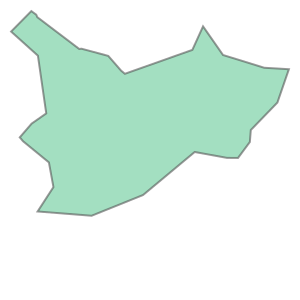

In [5]:
# we access the geomerty of the first city in the 'cities' GeoDataFrame
cities.loc[0, 'geometry']

<Axes: >

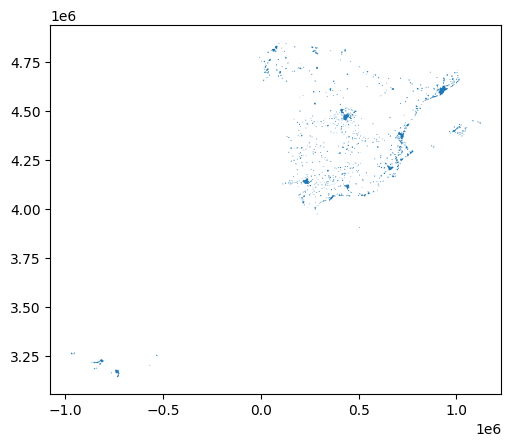

In [6]:
# plot our df
cities.plot()

## Lines
- Here we also use github to obtain a lines dataset

In [7]:
# load in our df

url = (
    "https://github.com/geochicasosm/lascallesdelasmujeres"
    "/raw/master/data/madrid/final_tile.geojson"
)
url

streets = geopandas.read_file(url)

In [8]:
# inspect our datafrane
streets.head()


,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
0,Plaza Virgen de la Capilla,123483746,,Female,,-,-,"POLYGON ((-3.71472 40.48250, -3.71460 40.48229..."
1,Plaza Nuestra Señora del Prado,123483930,,Female,,-,-,"POLYGON ((-3.71404 40.48271, -3.71392 40.48249..."
2,Avenida del Cardenal Herrera Oria,4272448,,Male,,None,None,"LINESTRING (-3.71421 40.48307, -3.71407 40.483..."
3,Glorieta de Mariano Salvador Maella,4292687,,Male,,None,None,"LINESTRING (-3.71660 40.47909, -3.71665 40.479..."
4,Calle de Pedro Rico,4292689,,Male,,None,None,"LINESTRING (-3.70463 40.48167, -3.70441 40.481..."


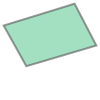

In [9]:
# we access the geomerty of the first 'street' in the 'streets' GeoDataFrame
streets.loc[0, 'geometry']

<Axes: >

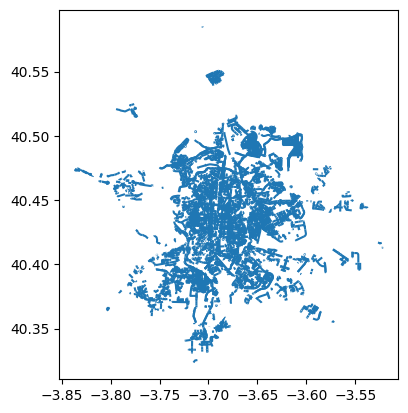

In [10]:
# plot our streets dataframe
streets.plot()

### *A note on the parquet file format*:

#### Parquet is a column-oriented data format designed as a modern alternative to CSV files.

Its key benefits include:

1. Columnar Storage: Parquet stores data in columns rather than rows, which improves query performance by minimizing I/O operations.
2. Compression Efficiency: It uses efficient compression algorithms, reducing storage space.
3. Schema Evolution: Parquet files can handle schema changes gracefully, making them suitable for evolving data.
4. Predicates Pushdown: Query engines can push filters down to the storage layer, further optimizing queries.
5. Column Pruning: Only relevant columns are read during query execution, enhancing efficiency.

### GeoParquet: Adding Geospatial Flavor
GeoParquet extends Parquet by incorporating interoperable geospatial types (such as Point, Line, and Polygon).
Here’s why GeoParquet shines:
1. Standard Geospatial Data in Parquet: GeoParquet adheres to an incubating Open Geospatial Consortium (OGC) standard, enabling seamless interoperability between systems that read or write spatial data in Parquet format.
2. Cloud Data Warehouse Interoperability: Platforms like Snowflake, BigQuery, RedShift, and DataBricks can work harmoniously with GeoParquet, sharing the same geospatial data format.
3. Structured Schema: GeoParquet maintains the schema and data type of each column alongside the data files, ensuring consistency and ease of use.
4. Spatial Analysis with Columnar Efficiency: Data science workflows benefit from columnar data formats, and geospatial analysis can tap into these innovations.
5. Tools and Libraries: GeoParquet is supported by various tools and libraries, including GeoPandas, QGIS, Scribble Maps, BigQuery Converter, CARTO, and more.

**Strengths and Weaknesses of Parquet (Including GeoParquet)**

Strengths:
- Efficient storage and compression.
- Schema evolution support.
- Excellent for analytical workloads.
- Geospatial capabilities in GeoParquet.

Weaknesses:
- Not ideal for transactional workloads.
- Limited support for updates and deletes.
- Complexity in handling nested structures.
- Requires specialized tools for efficient data manipulation.

In [11]:
import pyarrow
# data in github
pois = geopandas.read_parquet(r"C:\Users\hqxb\Downloads\gds_course-master\gds_course-master\content\data\web_cache\pois_bars_madrid.parquet")

In [12]:
# here we sinepct our df
pois.head()

,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,email,name,...,payment:cash,payment:credit_cards,start_date,air_conditioning,nodes,building,building:levels,source:date,barrier,level
0,node/26808561,26808561,node,Madrid,2,28015,Plaza de Cristino Martos,bar,hola@murcafe.com,Mür Café,...,None,None,None,None,None,None,None,None,None,None
1,node/43274445,43274445,node,None,None,None,None,bar,None,Cadillac Solitario,...,None,None,None,None,None,None,None,None,None,None
2,node/47216276,47216276,node,None,None,None,None,bar,None,Bar Barocco,...,None,None,None,None,None,None,None,None,None,None
3,node/167301896,167301896,node,None,None,None,None,bar,None,Bar,...,None,None,None,None,None,None,None,None,None,None
4,node/167301964,167301964,node,None,None,None,None,bar,None,None,...,None,None,None,None,None,None,None,None,None,None


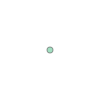

In [13]:
# we access the geomerty of the first 'poi' in the 'pois' GeoDataFrame
pois.loc[0, 'geometry']

<Axes: >

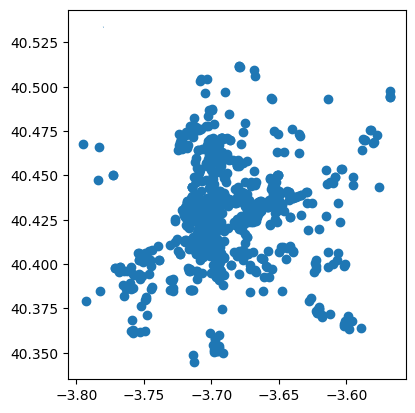

In [14]:
# let's plot it
pois.plot()


<Axes: >

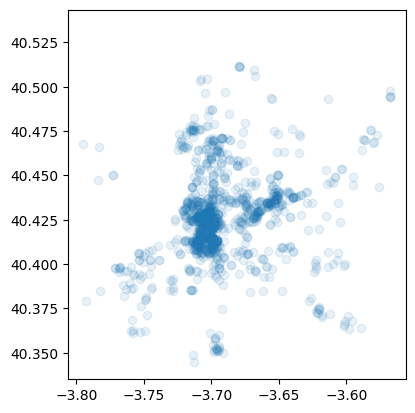

In [15]:
# it's a bit busy. Let's change the transparency
pois.plot(alpha=0.1)

## Manipulating Geospatial Data

### Examples on Area and legnth 

In [16]:
# Let's calculate the area
# This indicates that the area of the first city in our table takes up 8,450,000 squared metres. 
city_areas = cities.area
city_areas.head()

0    8.449666e+06
1    9.121270e+06
2    1.322653e+07
3    6.808121e+07
4    1.072284e+07
dtype: float64

In [17]:
cities.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
# If we wanted to convert into squared kilometres, we can divide by 1,000,000:
areas_in_sqkm = city_areas / 1000000
areas_in_sqkm.head()

0     8.449666
1     9.121270
2    13.226528
3    68.081212
4    10.722843
dtype: float64

In [19]:
# what happens if we don't convert the crs
street_length = streets.length
street_length.head()

C:\Users\hqxb\AppData\Local\Temp\ipykernel_4176\527221206.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  street_length = streets.length


0    0.001279
1    0.001279
2    0.004375
3    0.001594
4    0.001151
dtype: float64

In [20]:
streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# Here we will perform the projection (to_crs) and the calculation of the length at the same time
steets_01= streets.to_crs(epsg=25830)
street_length = steets_01.length
street_length.head()

0    120.776840
1    120.902920
2    396.494357
3    152.442895
4    101.392357
dtype: float64

In [22]:
steets_01.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Examples on Cetroid and Point in Polygon

In [23]:
# Sometimes it is useful to summarize a polygon into a single point and, for that, a good candidate is its centroid
cents = cities.centroid
cents.head()

0    POINT (386147.759 4204605.994)
1    POINT (216296.159 4579397.331)
2    POINT (688901.588 4180201.774)
3    POINT (518262.028 4069898.674)
4    POINT (206940.936 4127361.966)
dtype: geometry

<Axes: >

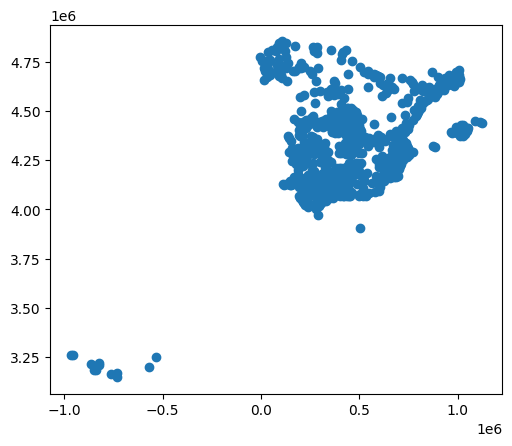

In [24]:
# Now we plot this
cents.plot()

### Point in polygon (PiP)



### Easy to understand, intresting to code:

#### Part 1
-  We have a GeoDataFrame containing geographic data.
-  We accesses data within the GeoDataFrame using .loc, a label-based data selecting method.
-  Specifies access to the row labeled 12 and the "geometry" column.
- Assigned the geometric data from the 13th row (index 12) of the `cities` GeoDataFrame

#### Part 2
- We retrive the first element of a GeoSeries points representing centroids.


In [ ]:
poly = cities.loc[12, "geometry"]
pt1 = cents[0]
pt2 = cents[112]

In [ ]:
# does out polygon have point 1?
poly.contains(pt1)

False

In [ ]:
# does ou polygon have point 2?
poly.contains(pt2)

False

In [ ]:
# let's check the crs
pois_projected = pois.to_crs(cities.crs)
pois_projected.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Buffers

In [ ]:
# let's check the crs
# we will make it the ame crs as cities
pois_projected = pois.to_crs(cities.crs)
pois_projected.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# let's buffer by 500 m 
buf = pois_projected.buffer(500)
buf.head()

0    POLYGON ((440085.759 4475244.528, 440083.352 4...
1    POLYGON ((441199.443 4482099.370, 441197.035 4...
2    POLYGON ((440012.154 4473848.877, 440009.747 4...
3    POLYGON ((441631.862 4473439.094, 441629.454 4...
4    POLYGON ((441283.067 4473680.493, 441280.659 4...
dtype: geometry

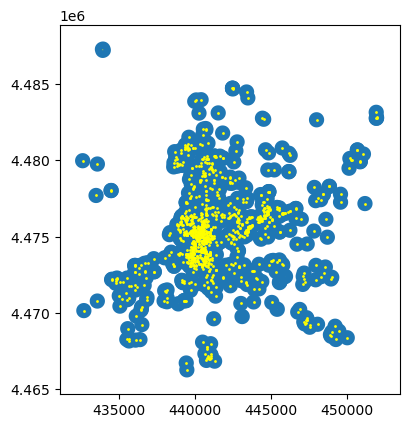

In [ ]:
# let's plot this

f, ax = plt.subplots(1)
# Plot buffer
buf.plot(ax=ax, linewidth=0)
# Plot named places on top for reference
# [NOTE how we modify the dot size (`markersize`)
# and the color (`color`)]
pois_projected.plot(ax=ax, markersize=1, color='yellow')